<a href="https://colab.research.google.com/github/TheZohar11/fifa_world_cup_analysis/blob/main/DataScience_zs_and_yz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting Kaggle's Datasets API
get a Kaggle API key, and create access to download Kaggle's datasets.


In [ ]:
import json
import os
# project by Yakir Zindani and Zohar Simhon
# Installing the Kaggle package
!pip install kaggle

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"yakirzindani","key":"e7b5df5027c96fc6efa201514bbf409e"}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
!mkdir /root/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json


## download the fifa-world dataset and use kaggle API

In [ ]:
# Creating a dataset directory
!mkdir -p /content/datasets/fifa-world-cup

In [ ]:
# download the dataset from Kaggle and unzip it
!kaggle datasets download -d abecklas/fifa-world-cup -p /content/datasets/fifa-world-cup

# Change directory to the dataset directory
%cd /content/datasets/fifa-world-cup


Dataset URL: https://www.kaggle.com/datasets/abecklas/fifa-world-cup
License(s): CC0-1.0
  0% 0.00/349k [00:00<?, ?B/s]
100% 349k/349k [00:00<00:00, 27.3MB/s]
/content/datasets/fifa-world-cup


In [ ]:
# !unzip ./datasets/fifa-worls-cup/database.sqlite/*.zip
!unzip fifa-world-cup.zip

Archive:  fifa-world-cup.zip
  inflating: WorldCupMatches.csv     
  inflating: WorldCupPlayers.csv     
  inflating: WorldCups.csv           


In [ ]:
import sqlite3
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

DB_PATH = '/content/datasets/fifa-world-cup/WorldCups.csv'

##Conversion of a csv file to sql

In [ ]:
import pandas as pd
import sqlite3
import os

csv_file = 'WorldCups.csv'
db_file = 'WorldCups.sqlite'
table_name = 'WorldCups'

df = pd.read_csv(csv_file)

if not os.path.exists(db_file):
    conn = sqlite3.connect(db_file)
    df.to_sql(name=table_name, con=conn, index=False, if_exists='append')
    print(f"Data imported to {db_file} successfully.")
else:
    conn = sqlite3.connect(db_file)
    print(f"Database {db_file} already exists. Replacing data.")
    df.to_sql(name=table_name, con=conn, index=False, if_exists='replace')
    print("Data replaced successfully.")


Data imported to WorldCups.sqlite successfully.


##SQL queries on a WorldCups table and displaying them in pandas

In [ ]:
c = conn.cursor() # creating a cursor object
results = c.execute("""
          SELECT *
          FROM WorldCups
          """).fetchall()
results

[(1930,
  'Uruguay',
  'Uruguay',
  'Argentina',
  'USA',
  'Yugoslavia',
  70,
  13,
  18,
  '590.549'),
 (1934,
  'Italy',
  'Italy',
  'Czechoslovakia',
  'Germany',
  'Austria',
  70,
  16,
  17,
  '363.000'),
 (1938,
  'France',
  'Italy',
  'Hungary',
  'Brazil',
  'Sweden',
  84,
  15,
  18,
  '375.700'),
 (1950,
  'Brazil',
  'Uruguay',
  'Brazil',
  'Sweden',
  'Spain',
  88,
  13,
  22,
  '1.045.246'),
 (1954,
  'Switzerland',
  'Germany FR',
  'Hungary',
  'Austria',
  'Uruguay',
  140,
  16,
  26,
  '768.607'),
 (1958,
  'Sweden',
  'Brazil',
  'Sweden',
  'France',
  'Germany FR',
  126,
  16,
  35,
  '819.810'),
 (1962,
  'Chile',
  'Brazil',
  'Czechoslovakia',
  'Chile',
  'Yugoslavia',
  89,
  16,
  32,
  '893.172'),
 (1966,
  'England',
  'England',
  'Germany FR',
  'Portugal',
  'Soviet Union',
  89,
  16,
  32,
  '1.563.135'),
 (1970,
  'Mexico',
  'Brazil',
  'Italy',
  'Germany FR',
  'Uruguay',
  95,
  16,
  32,
  '1.603.975'),
 (1974,
  'Germany',
  'Germany FR

##display world cup dataset


In [ ]:
import pandas as pd

column_names = [description[0] for description in c.description]
df = pd.DataFrame(results, columns=column_names)
df

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


##Which team won the most times?

In [ ]:
c = conn.cursor() # creating a cursor object
results = c.execute("""
          SELECT Winner, COUNT(Winner) AS the_most_winner
          FROM WorldCups
          GROUP BY Winner
          ORDER BY the_most_winner DESC
          """).fetchall()
results

# Fetch the column names from the NationalNames table
column_names = [description[0] for description in c.description]

df1 = pd.DataFrame(results, columns=column_names)

df1


,Winner,the_most_winner
0,Brazil,5
1,Italy,4
2,Germany FR,3
3,Uruguay,2
4,Argentina,2
5,Spain,1
6,Germany,1
7,France,1
8,England,1


##Displaying data in a bar graph

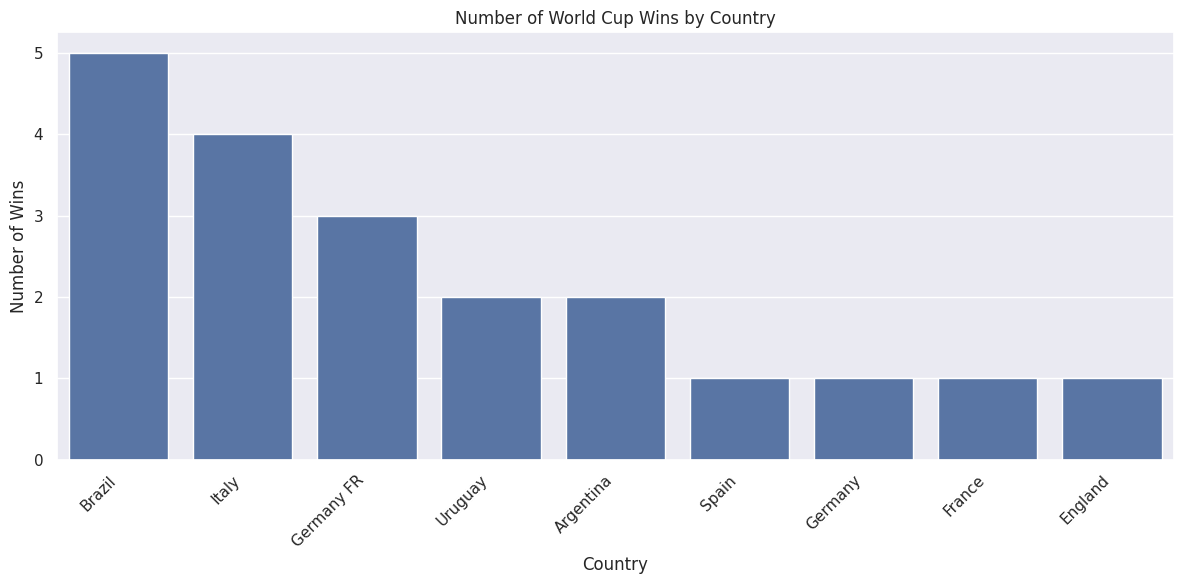

In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
sns.barplot(x='Winner', y='the_most_winner', data=df1)
plt.title('Number of World Cup Wins by Country')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Which team finished second the most

In [ ]:
c = conn.cursor() # creating a cursor object
results = c.execute("""
          SELECT `Runners-Up`, COUNT(`Runners-Up`) AS Second
          FROM WorldCups
          GROUP BY `Runners-Up`
          ORDER BY Second DESC
          """).fetchall()
results

# Fetch the column names from the NationalNames table
column_names = [description[0] for description in c.description]

df2 = pd.DataFrame(results, columns=column_names)

df2

,Runners-Up,Second
0,Netherlands,3
1,Germany FR,3
2,Argentina,3
3,Italy,2
4,Hungary,2
5,Czechoslovakia,2
6,Brazil,2
7,Sweden,1
8,Germany,1
9,France,1


##Displaying data in a bar graph

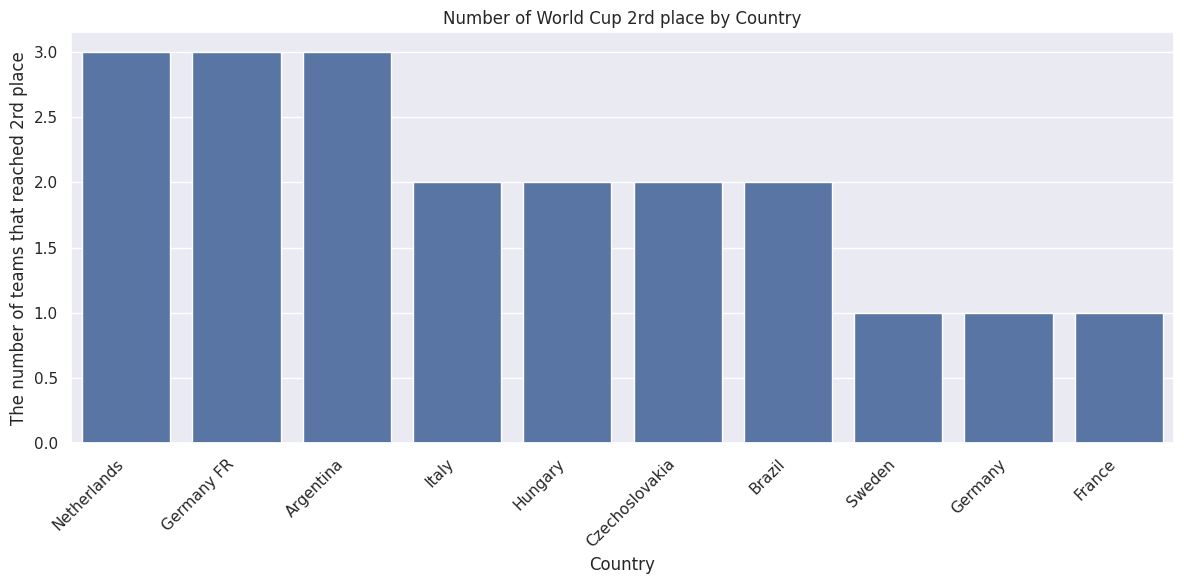

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
sns.barplot(x='Runners-Up', y='Second', data=df2)
plt.title('Number of World Cup 2rd place by Country')
plt.xlabel('Country')
plt.ylabel('The number of teams that reached 2rd place')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Rename columns to align for union
df1.rename(columns={'Winner': 'Team', 'the_most_winner': 'Final'}, inplace=True)
df2.rename(columns={'Runners-Up': 'Team', 'Second': 'Final'}, inplace=True)

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Group by team and sum counts
combined_df = combined_df.groupby('Team', as_index=False).sum()

combined_df = combined_df.sort_values(by='Final', ascending=False)

combined_df


,Team,Final
1,Brazil,7
6,Germany FR,6
8,Italy,6
0,Argentina,5
9,Netherlands,3
2,Czechoslovakia,2
4,France,2
5,Germany,2
7,Hungary,2
12,Uruguay,2


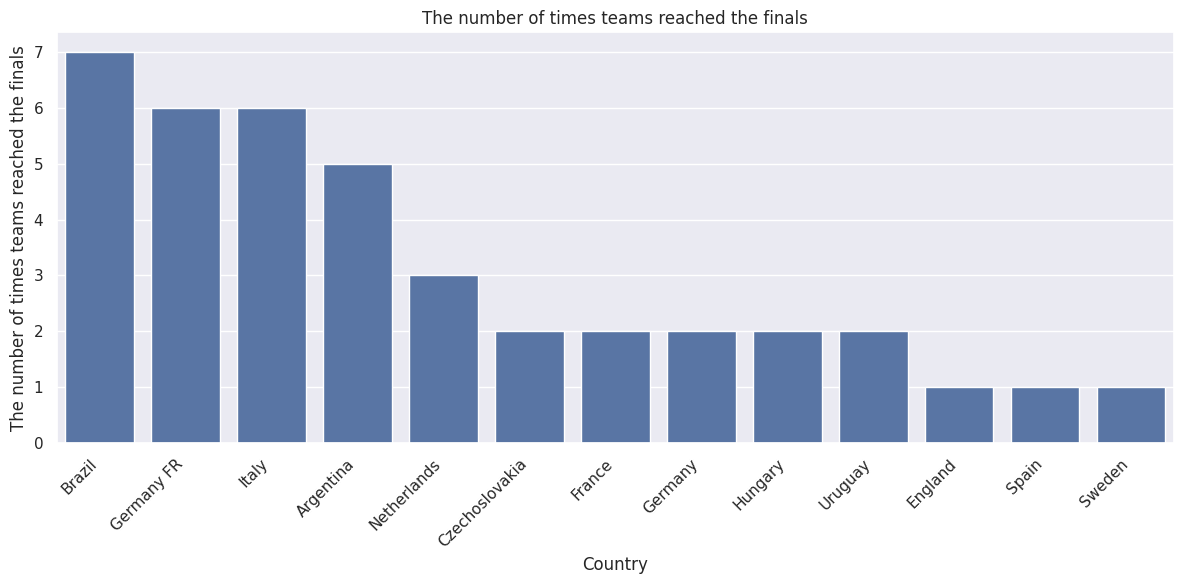

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
sns.barplot(x='Team', y='Final', data=combined_df)
plt.title('The number of times teams reached the finals')
plt.xlabel('Country')
plt.ylabel('The number of times teams reached the finals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Which team reached the final the most? after the unification of the German team

In [ ]:
# Replace "Germany FR" with "Germany" in both DataFrames
df1['Winner'] = df1['Winner'].replace('Germany FR', 'Germany')
df2['Runners-Up'] = df2['Runners-Up'].replace('Germany FR', 'Germany')

# Rename columns to align for union
df1.rename(columns={'Winner': 'Team', 'the_most_winner': 'Final'}, inplace=True)
df2.rename(columns={'Runners-Up': 'Team', 'Second': 'Final'}, inplace=True)

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Group by team and sum counts
combined_df = combined_df.groupby('Team', as_index=False).sum()

combined_df = combined_df.sort_values(by='Final', ascending=False)

In [ ]:
import numpy as np
combined_df.index = np.repeat('', len(combined_df))
combined_df

,Team,Final
,Germany,8
,Brazil,7
,Italy,6
,Argentina,5
,Netherlands,3
,Czechoslovakia,2
,France,2
,Hungary,2
,Uruguay,2
,England,1


##Displaying data in a bar graph

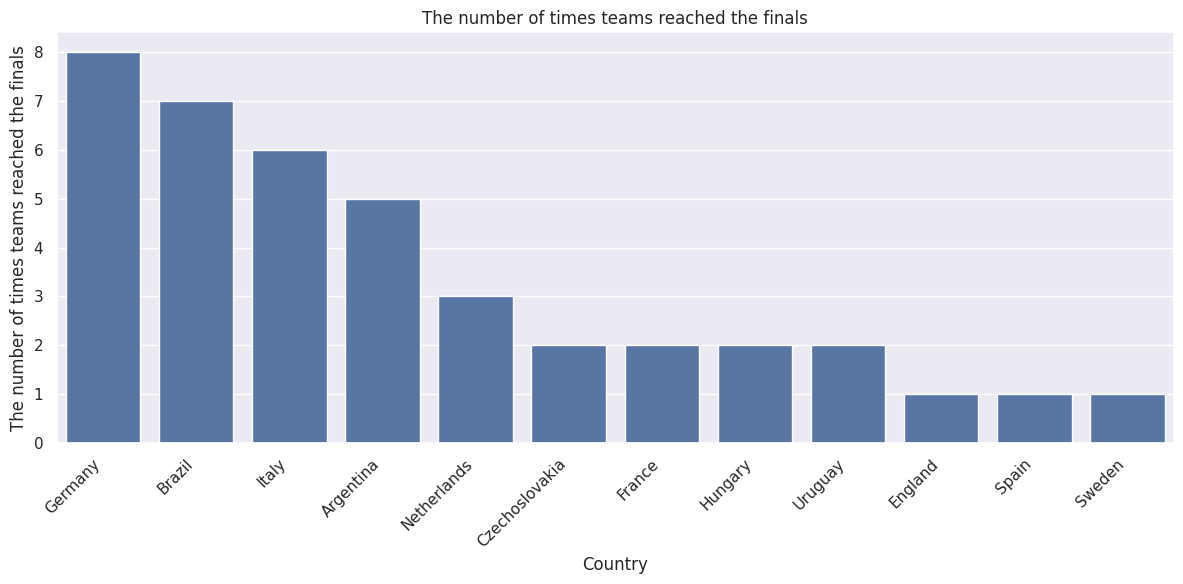

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
sns.barplot(x='Team', y='Final', data=combined_df)
plt.title('The number of times teams reached the finals')
plt.xlabel('Country')
plt.ylabel('The number of times teams reached the finals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Which team has reached third place the most?

In [ ]:
c = conn.cursor() # creating a cursor object
results = c.execute("""
          SELECT Third, count(Third) AS Thirder
          FROM WorldCups
          GROUP by Third
          ORDER by Thirder DESC
          """).fetchall()
results

# Fetch the column names from the NationalNames table
column_names = [description[0] for description in c.description]

df = pd.DataFrame(results, columns=column_names)

df

,Third,Thirder
0,Germany,3
1,Sweden,2
2,Poland,2
3,France,2
4,Brazil,2
5,USA,1
6,Turkey,1
7,Portugal,1
8,Netherlands,1
9,Italy,1


##Displaying data in a bar graph

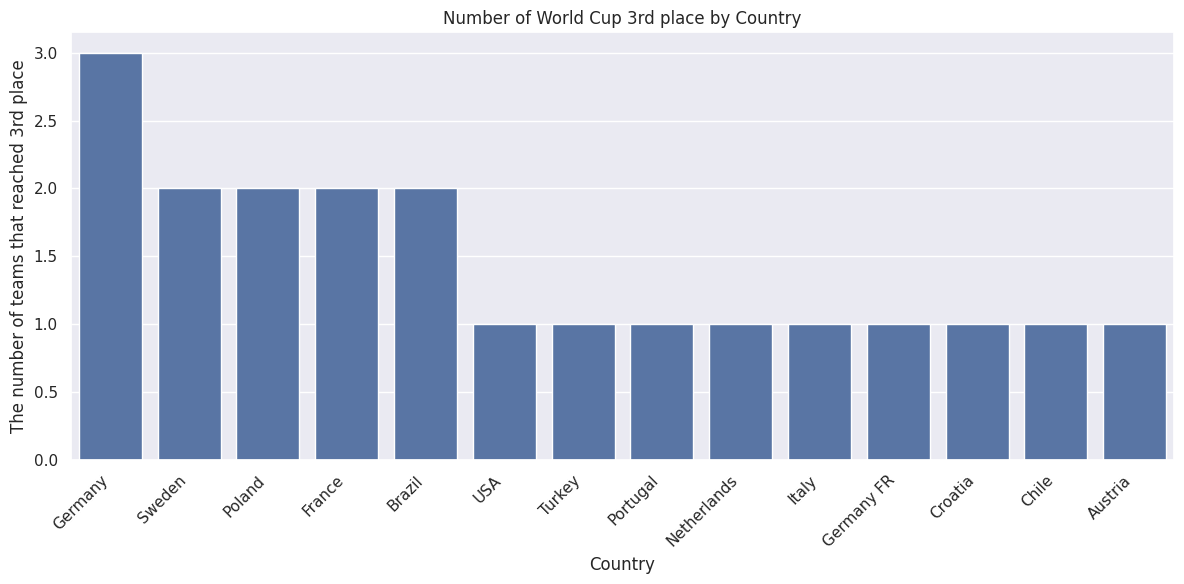

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
sns.barplot(x='Third', y='Thirder', data=df)
plt.title('Number of World Cup 3rd place by Country')
plt.xlabel('Country')
plt.ylabel('The number of teams that reached 3rd place')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Which team has reached fourth place the most?

In [ ]:
c = conn.cursor() # creating a cursor object
results = c.execute("""
          SELECT Fourth, count(Fourth) AS Fourther
          FROM WorldCups
          GROUP by Fourth
          ORDER by Fourther DESC
          """).fetchall()
results

# Fetch the column names from the NationalNames table
column_names = [description[0] for description in c.description]

df = pd.DataFrame(results, columns=column_names)

df

,Fourth,Fourther
0,Uruguay,3
1,Yugoslavia,2
2,Brazil,2
3,Sweden,1
4,Spain,1
5,Soviet Union,1
6,Portugal,1
7,Netherlands,1
8,Korea Republic,1
9,Italy,1


##Displaying data in a bar graph

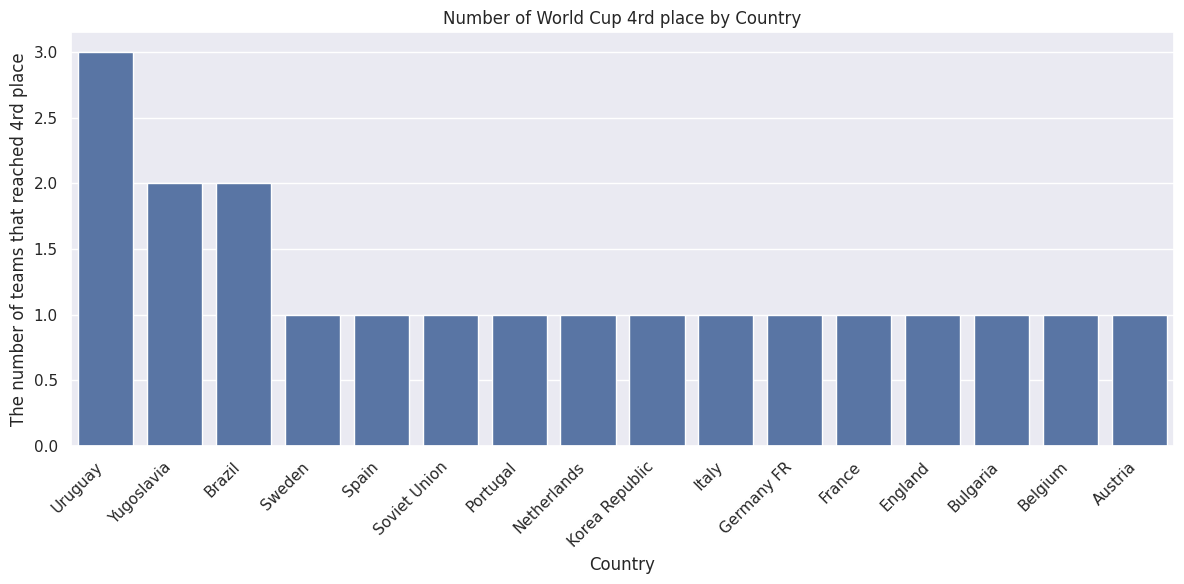

In [ ]:
plt.figure(figsize=(12, 6))
sns.set(style="darkgrid")
sns.barplot(x='Fourth', y='Fourther', data=df)
plt.title('Number of World Cup 4rd place by Country')
plt.xlabel('Country')
plt.ylabel('The number of teams that reached 4rd place')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##In which year were the most goals scored?

In [ ]:
c = conn.cursor() # creating a cursor object
results = c.execute("""
          SELECT Year, QualifiedTeams, GoalsScored
          FROM WorldCups
          ORDER BY Year ASC
          """).fetchall()

column_names = [description[0] for description in c.description]

df = pd.DataFrame(results, columns=column_names)

df

,Year,QualifiedTeams,GoalsScored
0,1930,13,70
1,1934,16,70
2,1938,15,84
3,1950,13,88
4,1954,16,140
5,1958,16,126
6,1962,16,89
7,1966,16,89
8,1970,16,95
9,1974,16,97


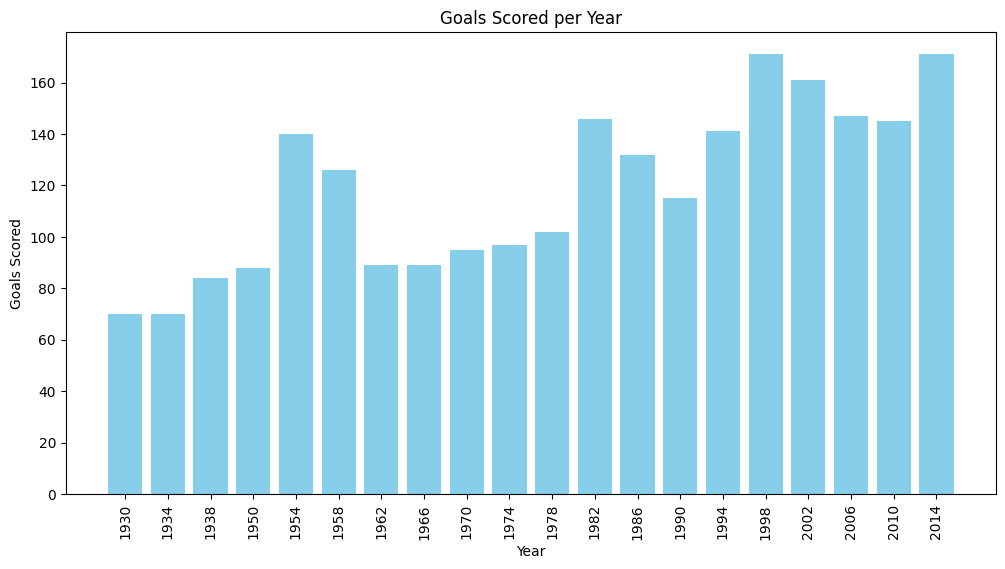

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df['Year'].astype(str), df['GoalsScored'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.title('Goals Scored per Year')
plt.xticks(rotation=90)

plt.show()

##In which year were the most goals scored? after normalization

In [ ]:
import pandas as pd
import sqlite3

results = c.execute("""
          SELECT Year, QualifiedTeams, GoalsScored
          FROM WorldCups
          ORDER BY GoalsScored DESC
          """).fetchall()

column_names = [description[0] for description in c.description]

df = pd.DataFrame(results, columns=column_names)

df['NormalizedGoals'] = df['GoalsScored'] / df['QualifiedTeams']

df_sorted = df.sort_values(by='Year', ascending=True)

df_sorted

,Year,QualifiedTeams,GoalsScored,NormalizedGoals
18,1930,13,70,5.384615
19,1934,16,70,4.375000
17,1938,15,84,5.600000
16,1950,13,88,6.769231
7,1954,16,140,8.750000
9,1958,16,126,7.875000
14,1962,16,89,5.562500
15,1966,16,89,5.562500
13,1970,16,95,5.937500
12,1974,16,97,6.062500


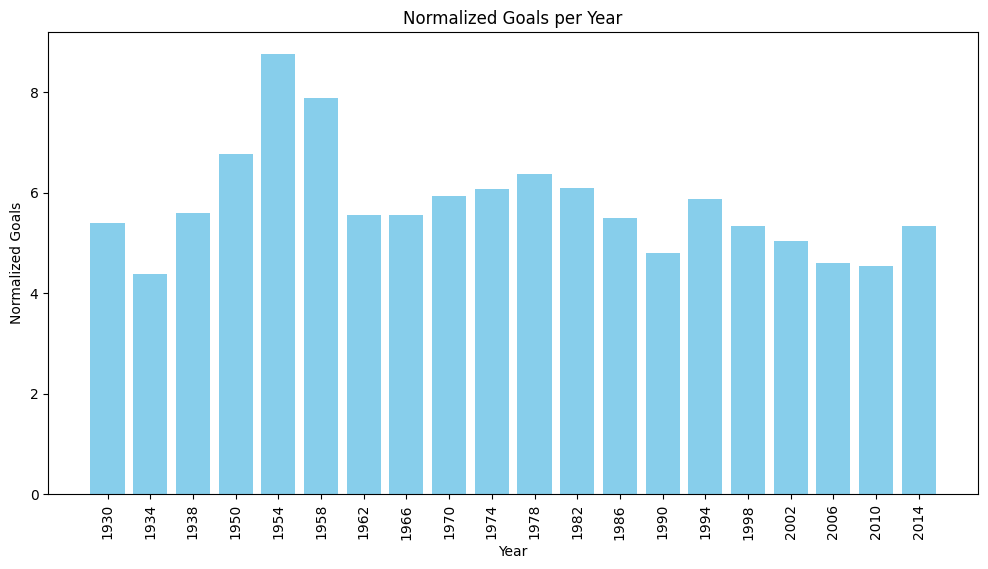

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Year'].astype(str), df_sorted['NormalizedGoals'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Normalized Goals')
plt.title('Normalized Goals per Year')
plt.xticks(rotation=90)

plt.show()

##What is the largest number of Attendance of all years?





In [ ]:
c = conn.cursor() # creating a cursor object
results = c.execute("""
          SELECT Year, Country, Attendance
          FROM WorldCups
          ORDER BY Year DESC
          """).fetchall()
results

# Fetch the column names from the NationalNames table
column_names = [description[0] for description in c.description]

df1 = pd.DataFrame(results, columns=column_names)

df1


,Year,Country,Attendance
0,2014,Brazil,3.386.810
1,2010,South Africa,3.178.856
2,2006,Germany,3.359.439
3,2002,Korea/Japan,2.705.197
4,1998,France,2.785.100
5,1994,USA,3.587.538
6,1990,Italy,2.516.215
7,1986,Mexico,2.394.031
8,1982,Spain,2.109.723
9,1978,Argentina,1.545.791


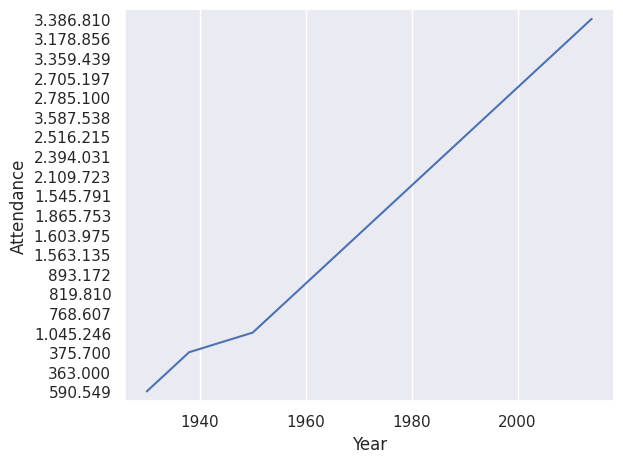

In [ ]:
import pandas as pd
import sqlite3
import seaborn.objects as so

plot = so.Plot(df1, x='Year', y='Attendance').add(so.Line())

# Customize the theme (example: dark grid)
plot.theme({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'grid.color': 'lightgrey',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
})

# Display the plot
plot.show()

In [ ]:
conn.close()

##SQL queries on a WorldCupPlayers table and displaying them in pandas

In [ ]:
import sqlite3
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

DB_PATH = '/content/datasets/fifa-world-cup/WorldCupPlayers.csv'

In [ ]:
import pandas as pd
import sqlite3
import os

# CSV and SQLite file names
csv_file = 'WorldCupPlayers.csv'
db_file = 'WorldCupPlayers.sqlite'
table_name = 'WorldCupPlayers'

# Reading data from CSV file
df = pd.read_csv(csv_file)

# Check if the SQLite file exists before creating the connection
if not os.path.exists(db_file):
    # Creating a connection to a new SQLite database
    conn = sqlite3.connect(db_file)
    # Saving the DataFrame to the SQLite database
    df.to_sql(name=table_name, con=conn, index=False, if_exists='append')
    print(f"Data imported to {db_file} successfully.")
else:
    # Creating a connection to an existing SQLite database
    conn = sqlite3.connect(db_file)
    print(f"Database {db_file} already exists. Replacing data.")
    # Replacing data in the existing table
    df.to_sql(name=table_name, con=conn, index=False, if_exists='replace')
    print("Data replaced successfully.")


Data imported to WorldCupPlayers.sqlite successfully.


##display world cup players dataset


In [ ]:
import pandas as pd
c = conn.cursor() # creating a cursor object
results2 = c.execute("""
          SELECT *
          FROM WorldCupPlayers
          """).fetchall()
results2
column_names = [description[0] for description in c.description]
df = pd.DataFrame(results2, columns=column_names)
df

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,None
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,None
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,None,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,None,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,None,None
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,None,None
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,None,None
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,None,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,None,None


##The coach who coached the most players in relation to the number of teams he coached

In [ ]:
results = c.execute("""
          SELECT "Coach Name",
                 COUNT("Player Name") AS PlayerCount,
                 COUNT(DISTINCT "Team Initials") AS UniqueTeamsCount
          FROM WorldCupPlayers
          GROUP BY "Coach Name"
          ORDER BY PlayerCount DESC
          """).fetchall()

column_names = [description[0] for description in c.description]

df = pd.DataFrame(results, columns=column_names)

df

,Coach Name,PlayerCount,UniqueTeamsCount
0,SCOLARI Luiz Felipe (BRA),575,2
1,SCHOEN Helmut (FRG),550,1
2,PARREIRA Carlos Alberto (BRA),514,5
3,MILUTINOVIC Bora (YUG),443,5
4,ZAGALLO Mario (BRA),440,1
...,...,...,...
330,VAN MASTENBROEK Johannes (NED),18,1
331,PASCUCCI Felipe (ITA),18,1
332,McREA James (SCO),17,1
333,LUIZ VINHAES (BRA),17,1


In [ ]:
conn.close()

##SQL queries on a WorldCupMatches table and displaying them in pandas

In [ ]:
import pandas as pd
import sqlite3
import os

# CSV and SQLite file names
csv_file = 'WorldCupMatches.csv'
db_file = 'WorldCupMatches.sqlite'
table_name = 'WorldCupMatches'

# Reading data from CSV file
df = pd.read_csv(csv_file)

# Check if the SQLite file exists
file_exists = os.path.exists(db_file)

# Creating a connection to the SQLite database
conn = sqlite3.connect(db_file)

if not file_exists:
    # Save the DataFrame to the SQLite database
    df.to_sql(name=table_name, con=conn, index=False, if_exists='append')
    print(f"Data imported to {db_file} successfully.")
else:
    print(f"Database {db_file} already exists. Replacing data.")
    # Replace data in the existing table
    df.to_sql(name=table_name, con=conn, index=False, if_exists='replace')
    print("Data replaced successfully.")


Database WorldCupMatches.sqlite already exists. Replacing data.
Data replaced successfully.


##display world cup matches dataset


In [ ]:
import pandas as pd
c = conn.cursor() # creating a cursor object
results2 = c.execute("""
          SELECT *
          FROM WorldCupMatches
          """).fetchall()
results2
column_names = [description[0] for description in c.description]
df = pd.DataFrame(results2, columns=column_names)
df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,None,None,None,None,None,NaN,NaN,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN,None,None
4568,NaN,None,None,None,None,None,NaN,NaN,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN,None,None
4569,NaN,None,None,None,None,None,NaN,NaN,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN,None,None
4570,NaN,None,None,None,None,None,NaN,NaN,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN,None,None


Removing empty lines

In [ ]:
import numpy as np

df = pd.read_csv('WorldCupMatches.csv')
df = df.dropna()
for column in df.columns:
    if df[column].dtype == 'float64':
        df[column] = df[column].apply(lambda x: int(x) if x.is_integer() else x)

df.index = np.repeat('', len(df))

df

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC
,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER
,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG
,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED


##The biggest goal difference in all games

In [ ]:
import pandas as pd
import numpy as np
import sqlite3

# Calculate the absolute goal difference using NumPy
df['Goal Difference'] = np.abs(df['Home Team Goals'].values - df['Away Team Goals'].values)

# Select the relevant columns
result_df = df[['Year', 'Stadium', 'Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals', 'Goal Difference']]

for column in result_df.columns:
    if result_df[column].dtype == 'float64':
        result_df[column] = result_df[column].apply(lambda x: int(x) if x.is_integer() else x)

# Sort by goal difference from largest to smallest
result_df = result_df.sort_values('Goal Difference', ascending=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Hide the indexes
result_df.index = np.repeat('', len(result_df))

result_df.head(20)


<ipython-input-23-7481c398b787>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[column] = result_df[column].apply(lambda x: int(x) if x.is_integer() else x)


,Year,Stadium,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals,Goal Difference
,1954.0,Hardturm,Hungary,Korea Republic,9.0,0.0,9.0
,1974.0,Parkstadion,Yugoslavia,Zaire,9.0,0.0,9.0
,1982.0,Nuevo Estadio,Hungary,El Salvador,10.0,1.0,9.0
,1950.0,Independencia,Uruguay,Bolivia,8.0,0.0,8.0
,1938.0,Fort Carree,Sweden,Cuba,8.0,0.0,8.0
,2002.0,Sapporo Dome,Germany,Saudi Arabia,8.0,0.0,8.0
,1954.0,Charmilles,Turkey,Korea Republic,7.0,0.0,7.0
,2010.0,Cape Town Stadium,Portugal,Korea DPR,7.0,0.0,7.0
,1974.0,Olympiastadion,Haiti,Poland,0.0,7.0,7.0
,1954.0,St. Jakob,Uruguay,Scotland,7.0,0.0,7.0


##Average goals per tournament

In [ ]:
df['Total Goals'] = df['Home Team Goals'] + df['Away Team Goals']
avg_goals_per_year = df.groupby('Year')['Total Goals'].mean().reset_index()

avg_goals_per_year.columns = ['Year', 'Average Goals']

avg_goals_per_year = avg_goals_per_year.sort_values('Year')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

avg_goals_per_year

,Year,Average Goals
0,1930.0,3.888889
1,1934.0,4.117647
2,1938.0,4.666667
3,1950.0,4.000000
4,1954.0,5.384615
5,1958.0,3.600000
6,1962.0,2.781250
7,1966.0,2.781250
8,1970.0,2.968750
9,1974.0,2.552632


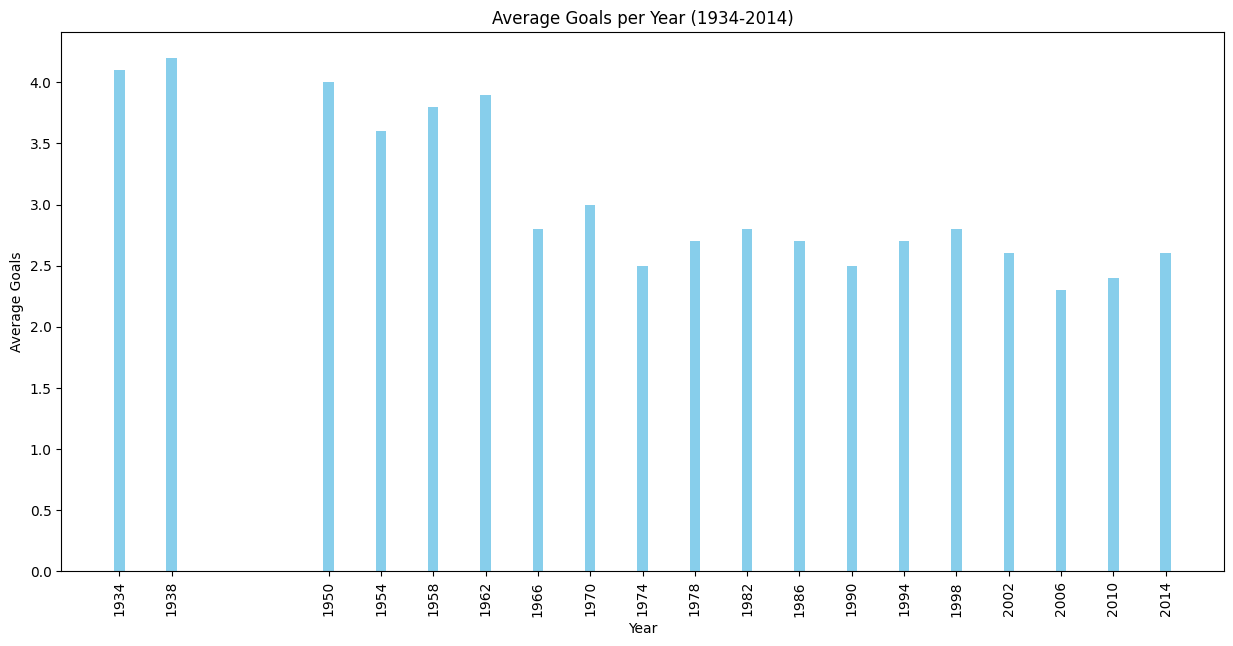

In [ ]:
import matplotlib.pyplot as plt

filtered_avg_goals = avg_goals_per_year[(avg_goals_per_year['Year'] >= 1934) & (avg_goals_per_year['Year'] <= 2014)]


plt.figure(figsize=(15, 7))
plt.bar(filtered_avg_goals['Year'], filtered_avg_goals['Average Goals'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Goals')
plt.title('Average Goals per Year (1934-2014)')
plt.xticks(filtered_avg_goals['Year'], rotation=90)

plt.show()



##The number of games in which there was overtime

In [ ]:
# Calculate the number of games with extra time
win_conditions_count = df['Win conditions'].str.strip().replace('', pd.NA).dropna().shape[0]

# Calculate the total number of games
total_games_count = df.shape[0]

print(f"The number of games in which there was extra time: {win_conditions_count} out of {total_games_count} games")


The number of games in which there was extra time: 63 out of 850 games


##Calculation of the number of games in which the host team won, the away team the number of times there was a draw

In [ ]:
home_wins_count = (result_df['Home Team Goals'] > result_df['Away Team Goals']).sum()
print(f"Number of games where the home team scored more goals than the away team: {home_wins_count}")

# Calculate and print the number of games where Away Team Goals > Home Team Goals
away_wins_count = (result_df['Away Team Goals'] > result_df['Home Team Goals']).sum()
print(f"Number of games where the away team scored more goals than the home team: {away_wins_count}")

draw_count = (result_df['Away Team Goals'] == result_df['Home Team Goals']).sum()
print(f"Number of games in which there was a draw: {draw_count}")


Number of games where the home team scored more goals than the away team: 486
Number of games where the away team scored more goals than the home team: 174
Number of games in which there was a draw: 190


##Calculating the probability of winning the game if you are a home team / away the probability of a draw

In [ ]:
import pandas as pd
import numpy as np

# Select the games where the home team scored more goals
home_wins_df = df[df['Home Team Goals'] > df['Away Team Goals']]
home_wins_count = home_wins_df.shape[0]

# Select the games where the away team scored more goals
away_wins_df = df[df['Away Team Goals'] > df['Home Team Goals']]
away_wins_count = away_wins_df.shape[0]

# Select the games that ended in a draw
draws_df = df[df['Home Team Goals'] == df['Away Team Goals']]
draws_count = draws_df.shape[0]

# Total number of games
total_games = df.shape[0]

# Calculate probabilities
home_win_prob = home_wins_count / total_games
away_win_prob = away_wins_count / total_games
draw_prob = draws_count / total_games

# Print the results
print(f"Number of games where the home team scored more goals than the away team: {home_wins_count}")
print(f"Number of games where the away team scored more goals than the home team: {away_wins_count}")
print(f"Number of games in which there was a draw: {draws_count}")
print(f"Total number of games: {total_games}")

print(f"Probability of a home team win: {home_win_prob:.2%}")
print(f"Probability of an away team win: {away_win_prob:.2%}")
print(f"Probability of a draw: {draw_prob:.2%}")


Number of games where the home team scored more goals than the away team: 486
Number of games where the away team scored more goals than the home team: 174
Number of games in which there was a draw: 190
Total number of games: 850
Probability of a home team win: 57.18%
Probability of an away team win: 20.47%
Probability of a draw: 22.35%


##Displaying the probabilities in a bar graph

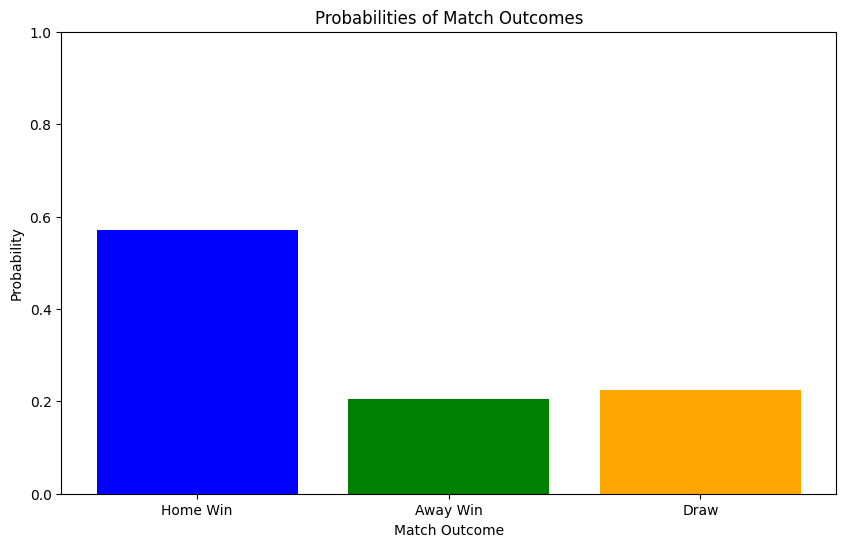

In [ ]:
import matplotlib.pyplot as plt
labels = ['Home Win', 'Away Win', 'Draw']
probabilities = [home_win_prob, away_win_prob, draw_prob]

plt.figure(figsize=(10, 6))
plt.bar(labels, probabilities, color=['blue', 'green', 'orange'])
plt.xlabel('Match Outcome')
plt.ylabel('Probability')
plt.title('Probabilities of Match Outcomes')
plt.ylim(0, 1)  # Set the y-axis limits from 0 to 1 to display probabilities
plt.show()


##The stadium where the most goals were scored

In [ ]:
import pandas as pd
import sqlite3

# Calculate the total number of goals in each match
df['Amount of goals'] = df['Home Team Goals'] + df['Away Team Goals']

# Summarize the total number of goals by stadium and the number of occurrences of each stadium
stadium_goals_sum = df.groupby('Stadium').agg({
    'Amount of goals': 'sum',
    'Stadium': 'size'
}).rename(columns={'Stadium': 'Amount of games'}).reset_index()

# Sort by the total number of goals from highest to lowest
stadium_goals_sum = stadium_goals_sum.sort_values('Amount of goals', ascending=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Hide the indexes
stadium_goals_sum.index = np.repeat('', len(stadium_goals_sum))

stadium_goals_sum


,Stadium,Amount of goals,Amount of games
,Estadio Azteca,52,19
,Estadio Centenario,44,10
,St. Jakob,44,6
,Nou Camp - Estadio Le�n,42,11
,Jalisco,39,14
...,...,...,...
,White City,3,1
,La Romareda,3,3
,Victor Boucquey,2,1
,Estadio Universitario,2,4


##The stadium where the most goals were scored. after normalization

In [ ]:
df['Amount of goals'] = df['Home Team Goals'] + df['Away Team Goals']

# Summarize the total number of goals by stadium and the number of occurrences of each stadium
stadium_goals_sum = df.groupby('Stadium').agg({
    'Amount of goals': 'sum',
    'Stadium': 'size'
}).rename(columns={'Stadium': 'Amount of games'}).reset_index()

# Add a column for normalized goals
stadium_goals_sum['Normalized Goals'] = stadium_goals_sum['Amount of goals'] / stadium_goals_sum['Amount of games']

# Sort by normalized goals from highest to lowest
stadium_goals_sum = stadium_goals_sum.sort_values('Normalized Goals', ascending=False)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Hide the indexes
stadium_goals_sum.index = np.repeat('', len(stadium_goals_sum))

stadium_goals_sum


,Stadium,Amount of goals,Amount of games,Normalized Goals
,Stade de la Meinau,11,1,11.000000
,Fort Carree,8,1,8.000000
,St. Jakob,44,6,7.333333
,Ilha do Retiro,7,1,7.000000
,Idrottsparken,19,3,6.333333
...,...,...,...,...
,Friuli,1,1,1.000000
,Sant Elia,3,3,1.000000
,Osaka Nagai Stadium,3,3,1.000000
,La Romareda,3,3,1.000000


##Calculating the probability of making a reversal after halftime

In [ ]:
import pandas as pd

# Select games where the home team scored more goals and the away team was leading at half-time
change_outcome_home_df = df[(df['Home Team Goals'] > df['Away Team Goals']) & (df['Half-time Away Goals'] > df['Half-time Home Goals'])]
home_wins_count = change_outcome_home_df.shape[0]

# Select games where the away team scored more goals and the home team was leading at half-time
change_outcome_away_df = df[(df['Away Team Goals'] > df['Home Team Goals']) & (df['Half-time Away Goals'] < df['Half-time Home Goals'])]
away_wins_count = change_outcome_away_df.shape[0]

# Total number of changes in outcome
amount_of_changes = home_wins_count + away_wins_count

# Total number of games
total_games = df.shape[0]

# Calculate the probability of a change in outcome
probability_of_change = amount_of_changes / total_games

print(f"Total number of changes in outcome: {amount_of_changes}")
print(f"Total number of games: {total_games}")
print(f"Probability of a change in outcome: {probability_of_change:.2%}")


Total number of changes in outcome: 38
Total number of games: 4572
Probability of a change in outcome: 0.83%


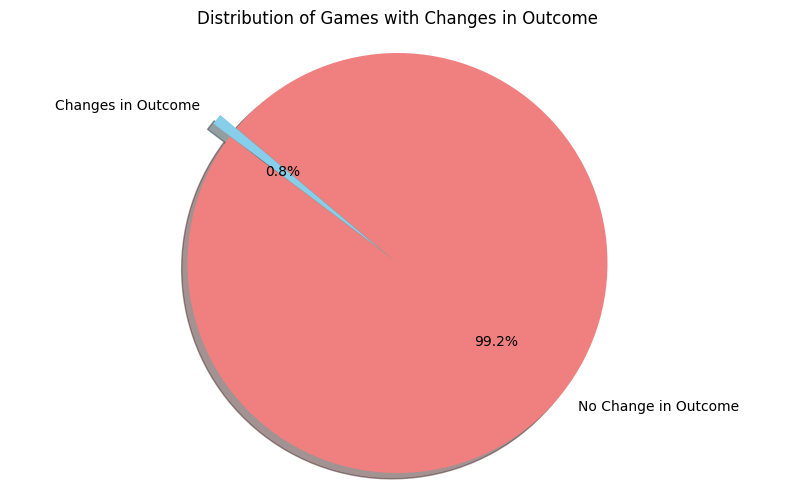

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

labels = ['Changes in Outcome', 'No Change in Outcome']
sizes = [amount_of_changes, total_games - amount_of_changes]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Games with Changes in Outcome')
plt.axis('equal')

plt.show()

##Calculating the chance of a draw after there was no draw at halftime

In [ ]:
import pandas as pd

# Select the games that ended in a draw
# Select games where the half-time result was not a draw
non_draw_at_half_time_df = df[df['Half-time Home Goals'] != df['Half-time Away Goals']]

# From these games, select those that ended in a draw
draw_after_non_draw_half_time_df = non_draw_at_half_time_df[non_draw_at_half_time_df['Home Team Goals'] == non_draw_at_half_time_df['Away Team Goals']]

# Calculate the number of draws after a non-draw half-time
draws_after_non_draw_half_time_count = draw_after_non_draw_half_time_df.shape[0]

# Calculate the total number of games where the half-time result was not a draw
total_non_draw_at_half_time_games = non_draw_at_half_time_df.shape[0]

# Calculate the probability of a draw after a non-draw half-time
probability_of_draw_after_non_draw_half_time = draws_after_non_draw_half_time_count / total_non_draw_at_half_time_games

print(f"Total number of draws after non-draw half-time: {draws_after_non_draw_half_time_count}")
print(f"Total number of games with non-draw half-time: {total_non_draw_at_half_time_games}")
print(f"Probability of a draw after non-draw half-time: {probability_of_draw_after_non_draw_half_time:.2%}")


Total number of draws after non-draw half-time: 52
Total number of games with non-draw half-time: 4182
Probability of a draw after non-draw half-time: 1.24%


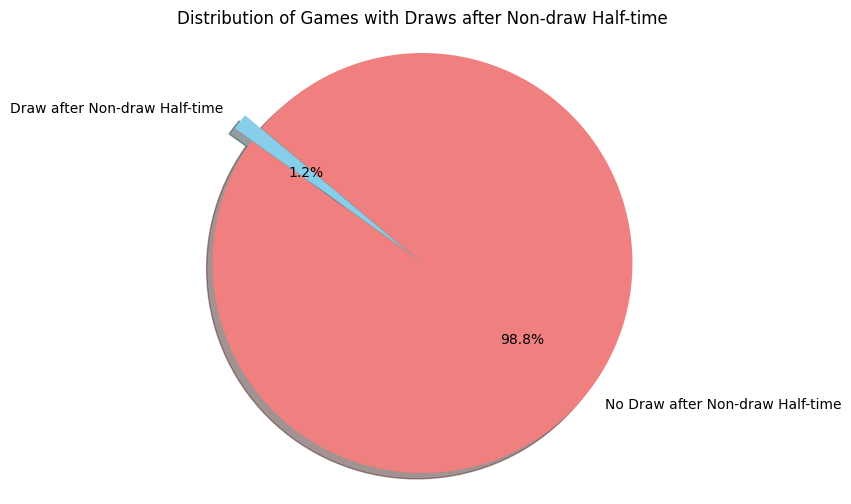

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

labels = ['Draw after Non-draw Half-time', 'No Draw after Non-draw Half-time']
sizes = [draws_after_non_draw_half_time_count, total_non_draw_at_half_time_games - draws_after_non_draw_half_time_count]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Games with Draws after Non-draw Half-time')
plt.axis('equal')

plt.show()